In [1]:
from pathlib import Path
import pandas as pd
# Mostrar floats com duas casas decimas
pd.set_option('display.float_format',  lambda x: '%.3g' % x)
pd.options.display.max_colwidth = 20
pd.options.display.max_columns = 20
pd.options.display.max_rows = 6

In [2]:
df_stocks = pd.read_csv("../data/magic_stocks.csv", parse_dates=["cutoff_date"])
df_stocks.rank_final = df_stocks.rank_final.astype(int)
df_stocks

,cutoff_date,codneg,codisi,especi,premed,totneg,codemi,year,codcvm,cia_nome,...,net_debt,ebit,roic,market_cap,enterprise_value,earnings_yield,rank_roic,rank_ey,ranks_sum,rank_final
0,2011-04-11,LREN3,BRLRENACNOR1,ON NM,6.56,3604,LREN,2011,8133,LOJAS RENNER S.A.,...,-2.72e+07,4.04e+08,0.407,8.03e+08,8.3e+08,0.487,5,7,12,1
1,2011-04-11,TOTS3,BRTOTSACNOR8,ON NM,8.73,244,TOTS,2011,19992,TOTVS S.A.,...,1.79e+08,2.12e+08,0.261,2.75e+08,9.53e+07,2.22,20,1,21,2
2,2011-04-11,BRAP4,BRBRAPACNPR2,PN N1,17.7,3861,BRAP,2011,18724,BRADESPAR S.A.,...,2.47e+09,2.45e+09,0.258,6.19e+09,3.72e+09,0.659,21,6,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2022-04-11,AMAR3,BRAMARACNOR4,ON NM,2.91,3715,AMAR,2022,22055,MARISA LOJAS S.A.,...,1.2e+09,4.8e+06,0.00218,7.61e+08,-4.4e+08,-0.0109,157,139,296,155
1209,2022-04-11,RDNI3,BRRDNIACNOR9,ON NM,8.01,35,RDNI,2022,20451,RNI NEGÓCIOS IMO...,...,4.71e+08,1.98e+07,0.0179,3.51e+08,-1.21e+08,-0.164,151,145,296,156
1210,2022-04-11,COGN3,BRCOGNACNOR2,ON NM,2.69,38694,COGN,2022,17973,COGNA EDUCAÇÃO S.A.,...,5.87e+09,7.84e+07,0.00399,5.05e+09,-8.19e+08,-0.0957,156,142,298,157


In [3]:
cols = ['cutoff_date', 'codneg', 'cia_nome', 'year',  'rank_final']
df_stocks = df_stocks.loc[:, cols]
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,LREN3,LOJAS RENNER S.A.,2011,1
1,2011-04-11,TOTS3,TOTVS S.A.,2011,2
2,2011-04-11,BRAP4,BRADESPAR S.A.,2011,3
...,...,...,...,...,...
1208,2022-04-11,AMAR3,MARISA LOJAS S.A.,2022,155
1209,2022-04-11,RDNI3,RNI NEGÓCIOS IMO...,2022,156
1210,2022-04-11,COGN3,COGNA EDUCAÇÃO S.A.,2022,157


In [4]:
# Selecionar as 30 primeiras empresas do ranking
df_stocks.query('rank_final <= 30', inplace=True)
df_stocks.reset_index(drop=True, inplace=True)
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,LREN3,LOJAS RENNER S.A.,2011,1
1,2011-04-11,TOTS3,TOTVS S.A.,2011,2
2,2011-04-11,BRAP4,BRADESPAR S.A.,2011,3
...,...,...,...,...,...
357,2022-04-11,JALL3,Jalles Machado S.A.,2022,28
358,2022-04-11,PDTC3,PADTEC HOLDING S.A.,2022,29
359,2022-04-11,POSI3,POSITIVO TECNOLO...,2022,30


In [5]:
PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
path = PROCESSED_PATH / "base_adj.feather"
df_b3 = pd.read_feather(path)
df_b3

,datneg,codneg,nomres,codisi,especi,codbdi,tpmerc,preabe,premax,premin,...,preofv,preexe,totneg,quatot,voltot,dismes,datven,prazot,event2,ajuste
0,2022-02-03,5GTK11,INVESTO 5GTK,BR5GTKCTF000,CI,14,10,95,101,94.9,...,97.7,0,85,2.08e+04,2e+06,100,NaT,0,,1
1,2022-02-04,5GTK11,INVESTO 5GTK,BR5GTKCTF000,CI,14,10,97,98.3,90.5,...,95.8,0,50,1.11e+03,1.06e+05,100,NaT,0,,1
2,2022-02-07,5GTK11,INVESTO 5GTK,BR5GTKCTF000,CI,14,10,95.8,96,94.5,...,94.5,0,32,2.07e+03,1.96e+05,100,NaT,0,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907284,2000-12-06,ZIVI4FF,ZIVI,BRZIVIACNPR1,PN *,96,20,0.4,0.4,0.4,...,0.46,0,2,7.62e+05,305,136,NaT,0,,1
10907285,2013-12-18,ZNTE6L,FERR ZANETTE,BRZNTEACNPB8,PNB,52,17,0.82,0.82,0.82,...,0,0,1,7.44e+05,6.1e+05,104,NaT,0,,1
10907286,2012-12-13,ZNTE7L,FERR ZANETTE,BRZNTEACNPC6,PNC*,52,17,0.82,0.82,0.82,...,0,0,1,4.76e+08,3.9e+05,111,NaT,0,,1


In [6]:
# Filtrar somente ações depois de 2011
df_prices = df_b3.copy()
df_prices.query(
    'codbdi == 2 and datneg >= "2011.01.01"',
    inplace=True
)
df_prices.reset_index(drop=True, inplace=True)
cols = ['datneg', 'codneg', 'codisi', 'especi', 'premed', 'totneg', 'quatot', 'voltot']
df_prices = df_prices.loc[:, cols]
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot
0,2020-02-07,A1AP34,BRA1APBDR001,DRN,35.8,2,1.72e+05,6.14e+06
1,2020-02-10,A1AP34,BRA1APBDR001,DRN,35.6,1,1.44e+04,5.12e+05
2,2020-02-13,A1AP34,BRA1APBDR001,DRN,36.8,1,6.4e+03,2.36e+05
...,...,...,...,...,...,...,...,...
1142299,2022-05-31,Z2SC34,BRZ2SCBDR000,DRN,24.2,1,9,218
1142300,2022-06-02,Z2SC34,BRZ2SCBDR000,DRN,25.6,1,5,128
1142301,2022-06-06,Z2SC34,BRZ2SCBDR000,DRN,25.1,1,3,75.3


In [7]:
df_prices = df_prices.merge(right=df_stocks, how='inner')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final
0,2013-11-11,ABEV3,BRABEVACNOR1,ON,13.1,15208,1e+07,1.31e+08,2014-04-10,AMBEV S.A.,2014,28
1,2013-11-12,ABEV3,BRABEVACNOR1,ON,12.9,28954,1.53e+07,1.98e+08,2014-04-10,AMBEV S.A.,2014,28
2,2013-11-13,ABEV3,BRABEVACNOR1,ON,12.9,13538,8.41e+06,1.08e+08,2014-04-10,AMBEV S.A.,2014,28
...,...,...,...,...,...,...,...,...,...,...,...,...
860365,2022-06-02,YDUQ3,BRYDUQACNOR3,ON NM,16.8,7959,1.73e+06,2.91e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26
860366,2022-06-03,YDUQ3,BRYDUQACNOR3,ON NM,15.8,7843,2.18e+06,3.46e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26
860367,2022-06-06,YDUQ3,BRYDUQACNOR3,ON NM,15.4,5322,1.07e+06,1.65e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26


In [8]:
cutoff_list = sorted(list(df_prices.cutoff_date.drop_duplicates()))
cutoff_list.append(cutoff_list[-1] + pd.DateOffset(years=1))
cutoff_dict = dict(enumerate(cutoff_list))
cutoff_dict

{0: Timestamp('2011-04-11 00:00:00'),
 1: Timestamp('2012-04-09 00:00:00'),
 2: Timestamp('2013-04-10 00:00:00'),
 3: Timestamp('2014-04-10 00:00:00'),
 4: Timestamp('2015-04-10 00:00:00'),
 5: Timestamp('2016-04-11 00:00:00'),
 6: Timestamp('2017-04-10 00:00:00'),
 7: Timestamp('2018-04-10 00:00:00'),
 8: Timestamp('2019-04-10 00:00:00'),
 9: Timestamp('2020-04-09 00:00:00'),
 10: Timestamp('2021-04-12 00:00:00'),
 11: Timestamp('2022-04-11 00:00:00'),
 12: Timestamp('2023-04-11 00:00:00')}

In [9]:
df_prices['cutoff_order'] = df_prices['cutoff_date'].rank(method='dense').astype(int)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,cutoff_order
0,2013-11-11,ABEV3,BRABEVACNOR1,ON,13.1,15208,1e+07,1.31e+08,2014-04-10,AMBEV S.A.,2014,28,4
1,2013-11-12,ABEV3,BRABEVACNOR1,ON,12.9,28954,1.53e+07,1.98e+08,2014-04-10,AMBEV S.A.,2014,28,4
2,2013-11-13,ABEV3,BRABEVACNOR1,ON,12.9,13538,8.41e+06,1.08e+08,2014-04-10,AMBEV S.A.,2014,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860365,2022-06-02,YDUQ3,BRYDUQACNOR3,ON NM,16.8,7959,1.73e+06,2.91e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,10
860366,2022-06-03,YDUQ3,BRYDUQACNOR3,ON NM,15.8,7843,2.18e+06,3.46e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,10
860367,2022-06-06,YDUQ3,BRYDUQACNOR3,ON NM,15.4,5322,1.07e+06,1.65e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,10


In [10]:
df_prices['next_cutoff'] = df_prices['cutoff_order'].map(cutoff_dict)
df_prices.drop(columns='cutoff_order', inplace=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2013-11-11,ABEV3,BRABEVACNOR1,ON,13.1,15208,1e+07,1.31e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
1,2013-11-12,ABEV3,BRABEVACNOR1,ON,12.9,28954,1.53e+07,1.98e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
2,2013-11-13,ABEV3,BRABEVACNOR1,ON,12.9,13538,8.41e+06,1.08e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860365,2022-06-02,YDUQ3,BRYDUQACNOR3,ON NM,16.8,7959,1.73e+06,2.91e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
860366,2022-06-03,YDUQ3,BRYDUQACNOR3,ON NM,15.8,7843,2.18e+06,3.46e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
860367,2022-06-06,YDUQ3,BRYDUQACNOR3,ON NM,15.4,5322,1.07e+06,1.65e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12


In [11]:
df_prices.query('cutoff_date <= datneg <= next_cutoff', inplace=True)
df_prices.sort_values(['codneg', 'datneg'], inplace=True, ignore_index=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2014-04-10,ABEV3,BRABEVACNOR1,ON ED,13.1,25222,1.46e+07,1.91e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
1,2014-04-11,ABEV3,BRABEVACNOR1,ON ED,13.3,21264,1.25e+07,1.66e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
2,2014-04-14,ABEV3,BRABEVACNOR1,ON ED,13.4,15882,7.38e+06,9.9e+07,2014-04-10,AMBEV S.A.,2014,28,2015-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82024,2021-04-08,YDUQ3,BRYDUQACNOR3,ON NM,29.8,13198,4.06e+06,1.21e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
82025,2021-04-09,YDUQ3,BRYDUQACNOR3,ON NM,30.5,19468,4.58e+06,1.4e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12
82026,2021-04-12,YDUQ3,BRYDUQACNOR3,ON NM,30.6,8471,1.89e+06,5.79e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12


In [12]:
df_prices['first_value'] = df_prices.groupby(by=['codneg', 'cutoff_date'])['premed'].transform('first')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value
0,2014-04-10,ABEV3,BRABEVACNOR1,ON ED,13.1,25222,1.46e+07,1.91e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1
1,2014-04-11,ABEV3,BRABEVACNOR1,ON ED,13.3,21264,1.25e+07,1.66e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1
2,2014-04-14,ABEV3,BRABEVACNOR1,ON ED,13.4,15882,7.38e+06,9.9e+07,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82024,2021-04-08,YDUQ3,BRYDUQACNOR3,ON NM,29.8,13198,4.06e+06,1.21e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2
82025,2021-04-09,YDUQ3,BRYDUQACNOR3,ON NM,30.5,19468,4.58e+06,1.4e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2
82026,2021-04-12,YDUQ3,BRYDUQACNOR3,ON NM,30.6,8471,1.89e+06,5.79e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2


In [13]:
df_prices['price_n'] = 100 * df_prices.premed / df_prices.first_value 
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n
0,2014-04-10,ABEV3,BRABEVACNOR1,ON ED,13.1,25222,1.46e+07,1.91e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,100
1,2014-04-11,ABEV3,BRABEVACNOR1,ON ED,13.3,21264,1.25e+07,1.66e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,102
2,2014-04-14,ABEV3,BRABEVACNOR1,ON ED,13.4,15882,7.38e+06,9.9e+07,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82024,2021-04-08,YDUQ3,BRYDUQACNOR3,ON NM,29.8,13198,4.06e+06,1.21e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,114
82025,2021-04-09,YDUQ3,BRYDUQACNOR3,ON NM,30.5,19468,4.58e+06,1.4e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,117
82026,2021-04-12,YDUQ3,BRYDUQACNOR3,ON NM,30.6,8471,1.89e+06,5.79e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,117


In [14]:
df_prices['pct_change'] = df_prices.groupby(by=['codneg', 'next_cutoff'])['price_n'].pct_change()
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
0,2014-04-10,ABEV3,BRABEVACNOR1,ON ED,13.1,25222,1.46e+07,1.91e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,100,NaN
1,2014-04-11,ABEV3,BRABEVACNOR1,ON ED,13.3,21264,1.25e+07,1.66e+08,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,102,0.0183
2,2014-04-14,ABEV3,BRABEVACNOR1,ON ED,13.4,15882,7.38e+06,9.9e+07,2014-04-10,AMBEV S.A.,2014,28,2015-04-10,13.1,102,0.00523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82024,2021-04-08,YDUQ3,BRYDUQACNOR3,ON NM,29.8,13198,4.06e+06,1.21e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,114,0.0463
82025,2021-04-09,YDUQ3,BRYDUQACNOR3,ON NM,30.5,19468,4.58e+06,1.4e+08,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,117,0.0246
82026,2021-04-12,YDUQ3,BRYDUQACNOR3,ON NM,30.6,8471,1.89e+06,5.79e+07,2020-04-09,YDUQS PARTICIPAC...,2020,26,2021-04-12,26.2,117,0.00192


In [15]:
df_prices.sort_values('pct_change', ascending=True).head(6)

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
66516,2018-10-15,SMLS3,BRSMLSACNOR1,ON NM,24.6,26207,1.39e+07,3.42e+08,2018-04-10,SMILES FIDELIDAD...,2018,27,2019-04-10,47.7,51.6,-0.349
66867,2020-03-18,SMLS3,BRSMLSACNOR1,ON NM,8.93,14016,5.32e+06,4.75e+07,2019-04-10,SMILES FIDELIDAD...,2019,9,2020-04-09,34.5,25.9,-0.331
2762,2020-03-18,AMAR3,BRAMARACNOR4,ON NM,3.54,17634,7.82e+06,2.78e+07,2019-04-10,MARISA LOJAS S.A.,2019,6,2020-04-09,6.25,56.7,-0.331
66865,2020-03-16,SMLS3,BRSMLSACNOR1,ON NM,13.1,16910,5.62e+06,7.34e+07,2019-04-10,SMILES FIDELIDAD...,2019,9,2020-04-09,34.5,37.9,-0.317
16052,2020-03-12,CVCB3,BRCVCBACNOR1,ON NM,12.2,14961,7e+06,8.57e+07,2019-04-10,CVC BRASIL OPERA...,2019,22,2020-04-09,46.3,26.5,-0.315
8487,2020-03-12,BRKM3,BRBRKMACNOR1,ON N1,17.5,143,8.43e+04,1.48e+06,2019-04-10,BRASKEM S.A.,2019,3,2020-04-09,40.4,43.3,-0.267


In [16]:
df_return = df_prices.groupby(by=['datneg', 'next_cutoff'])['price_n'].mean().reset_index()
df_return

,datneg,next_cutoff,price_n
0,2011-04-11,2012-04-09,100
1,2011-04-12,2012-04-09,99.2
2,2011-04-13,2012-04-09,98.8
...,...,...,...
2769,2022-06-02,2023-04-11,104
2770,2022-06-03,2023-04-11,104
2771,2022-06-06,2023-04-11,103


In [17]:
df_return['last_group_price'] = df_return.groupby(by=['next_cutoff'])['price_n'].transform('last')
df_return

,datneg,next_cutoff,price_n,last_group_price
0,2011-04-11,2012-04-09,100,113
1,2011-04-12,2012-04-09,99.2,113
2,2011-04-13,2012-04-09,98.8,113
...,...,...,...,...
2769,2022-06-02,2023-04-11,104,103
2770,2022-06-03,2023-04-11,104,103
2771,2022-06-06,2023-04-11,103,103


In [18]:
factor = 1
df_return['price_acum'] = 0
for i in df_return.index:
    df_return.loc[i, 'price_acum'] = df_return.loc[i, 'price_n'] * factor
    if df_return.loc[i].datneg ==  df_return.loc[i].next_cutoff:
        factor = factor * df_return.loc[i, 'price_n'] / 100
        print(i, factor)

248 1.1301704711630542
495 1.3535470042158195
746 1.1767651347479178
994 1.0661417155643083
1240 0.9437749164652796
1491 1.175666808220999
1737 1.5796722512701393
1984 1.6844159989710903
2234 1.6325141526540847
2482 2.9029745778388243
2732 2.9360412689930455


In [19]:
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,113,100
1,2011-04-12,2012-04-09,99.2,113,99.2
2,2011-04-13,2012-04-09,98.8,113,98.8
...,...,...,...,...,...
2769,2022-06-02,2023-04-11,104,103,307
2770,2022-06-03,2023-04-11,104,103,305
2771,2022-06-06,2023-04-11,103,103,301


In [20]:
df_return.loc[247:250]

,datneg,next_cutoff,price_n,last_group_price,price_acum
247,2012-04-05,2012-04-09,115,113,115
248,2012-04-09,2012-04-09,113,113,113
249,2012-04-09,2013-04-10,100,120,113
250,2012-04-10,2013-04-10,99.4,120,112


In [21]:
df_return.loc[494:498]

,datneg,next_cutoff,price_n,last_group_price,price_acum
494,2013-04-09,2013-04-10,119,120,134
495,2013-04-10,2013-04-10,120,120,135
496,2013-04-10,2014-04-10,100,86.9,135
497,2013-04-11,2014-04-10,99.2,86.9,134
498,2013-04-12,2014-04-10,98.7,86.9,134


In [22]:
df_return.drop_duplicates('datneg', inplace=True)
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,113,100
1,2011-04-12,2012-04-09,99.2,113,99.2
2,2011-04-13,2012-04-09,98.8,113,98.8
...,...,...,...,...,...
2769,2022-06-02,2023-04-11,104,103,307
2770,2022-06-03,2023-04-11,104,103,305
2771,2022-06-06,2023-04-11,103,103,301


In [23]:
cols = ['datneg', 'premed']
df_bova = df_b3.query('codneg == "BOVA11" and datneg >= "2011-04-11"')[cols]
df_bova.reset_index(drop=True, inplace=True)
df_bova

,datneg,premed
0,2011-04-11,67.8
1,2011-04-12,66.4
2,2011-04-13,65.9
...,...,...
2758,2022-06-02,108
2759,2022-06-03,107
2760,2022-06-06,107


In [24]:
df_bova.premed = 100 * df_bova.premed / df_bova.loc[0, 'premed']
df_bova

,datneg,premed
0,2011-04-11,100
1,2011-04-12,98
2,2011-04-13,97.2
...,...,...
2758,2022-06-02,160
2759,2022-06-03,158
2760,2022-06-06,158


In [25]:
df_return = df_return.merge(right=df_bova, how='inner')
df_return.rename(
    columns={"price_acum": "MagicFormula", "premed": "BOVA11"}, inplace=True)
df_return.set_index('datneg', inplace=True)
df_return

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2011-04-11,2012-04-09,100,113,100,100
2011-04-12,2012-04-09,99.2,113,99.2,98
2011-04-13,2012-04-09,98.8,113,98.8,97.2
...,...,...,...,...,...
2022-06-02,2023-04-11,104,103,307,160
2022-06-03,2023-04-11,104,103,305,158
2022-06-06,2023-04-11,103,103,301,158


<AxesSubplot:xlabel='datneg'>

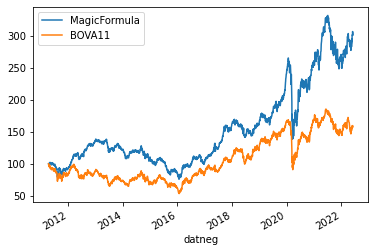

In [26]:
df_return[['MagicFormula', 'BOVA11']].plot()

<AxesSubplot:xlabel='datneg'>

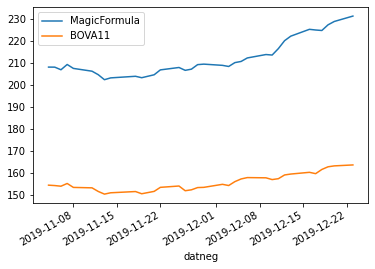

In [35]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')[['MagicFormula', 'BOVA11']].plot()

In [75]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2019-11-04,2020-04-09,106,85.4,135,154
2019-11-05,2020-04-09,106,85.4,136,154
2019-11-06,2020-04-09,106,85.4,135,154
...,...,...,...,...,...
2019-12-19,2020-04-09,119,85.4,152,163
2019-12-20,2020-04-09,120,85.4,153,163
2019-12-23,2020-04-09,122,85.4,155,164
